In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=(12,7)
import seaborn as sns


### Employee Dataset

In [66]:
df = pd.read_csv("employee_data.csv")

In [67]:
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [68]:
df.drop(columns=["Unnamed: 0","id"],inplace=True)

In [69]:
df.isnull().sum()

groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   groups            1000 non-null   object
 1   age               1000 non-null   int64 
 2   healthy_eating    1000 non-null   int64 
 3   active_lifestyle  1000 non-null   int64 
 4   salary            1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [71]:
df.describe()

,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,41.155000,4.944000,5.683000,2227.46100
std,13.462995,2.013186,2.048587,1080.20976
min,18.000000,0.000000,0.000000,553.00000
25%,30.000000,4.000000,4.000000,1360.00000
50%,41.000000,5.000000,6.000000,2174.00000
75%,53.000000,6.000000,7.000000,2993.75000
max,64.000000,10.000000,10.000000,5550.00000


In [72]:
df.groupby("groups").mean()

,age,healthy_eating,active_lifestyle,salary
groups,,,,
A,41.029333,4.813333,5.578667,2176.221333
AB,42.976000,5.192000,5.968000,2261.688000
B,42.048000,4.856000,5.592000,2232.776000
O,40.376000,5.021333,5.722667,2265.520000


In [73]:
df.groupby("groups").median()

,age,healthy_eating,active_lifestyle,salary
groups,,,,
A,43.0,5.0,6.0,2065.0
AB,41.0,5.0,6.0,2065.0
B,43.0,5.0,6.0,2174.0
O,41.0,5.0,6.0,2182.0


In [74]:
df.groupby("groups").min()

,age,healthy_eating,active_lifestyle,salary
groups,,,,
A,18,0,0,553
AB,18,0,0,553
B,18,0,0,553
O,18,0,1,553


In [75]:
df.groupby("groups").max()

,age,healthy_eating,active_lifestyle,salary
groups,,,,
A,64,10,10,5435
AB,64,10,10,5435
B,64,9,10,5550
O,64,10,10,5435


In [76]:
df.groupby("groups").std()

,age,healthy_eating,active_lifestyle,salary
groups,,,,
A,13.681507,1.940928,2.064099,1037.818981
AB,14.415194,2.089513,2.117272,1189.918352
B,13.324036,2.176502,2.174248,1171.430177
O,12.930913,1.998548,1.962998,1053.963616


In [77]:
df.groupby("groups")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
A,375.0,41.029333,13.681507,18.0,29.5,43.0,53.0,64.0
AB,125.0,42.976000,14.415194,18.0,32.0,41.0,58.0,64.0
B,125.0,42.048000,13.324036,18.0,30.0,43.0,54.0,64.0
O,375.0,40.376000,12.930913,18.0,30.0,41.0,51.0,64.0


In [78]:
df.groupby("groups")['healthy_eating'].describe()

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
A,375.0,4.813333,1.940928,0.0,3.0,5.0,6.0,10.0
AB,125.0,5.192000,2.089513,0.0,4.0,5.0,6.0,10.0
B,125.0,4.856000,2.176502,0.0,3.0,5.0,7.0,9.0
O,375.0,5.021333,1.998548,0.0,4.0,5.0,6.0,10.0


In [79]:
df.groupby("groups")['active_lifestyle'].describe()

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
A,375.0,5.578667,2.064099,0.0,4.0,6.0,7.0,10.0
AB,125.0,5.968000,2.117272,0.0,5.0,6.0,7.0,10.0
B,125.0,5.592000,2.174248,0.0,4.0,6.0,7.0,10.0
O,375.0,5.722667,1.962998,1.0,4.0,6.0,7.0,10.0


In [80]:
df.groupby("groups")['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
A,375.0,2176.221333,1037.818981,553.0,1252.0,2065.0,2878.0,5435.0
AB,125.0,2261.688000,1189.918352,553.0,1252.0,2065.0,3110.0,5435.0
B,125.0,2232.776000,1171.430177,553.0,1252.0,2174.0,3110.0,5550.0
O,375.0,2265.520000,1053.963616,553.0,1366.0,2182.0,2996.0,5435.0


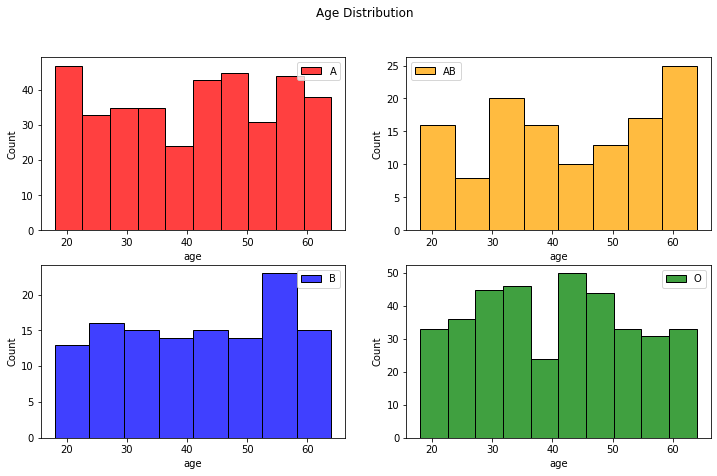

In [81]:
x1=df[df['groups']=='A']
x2=df[df['groups']=='AB']
x3=df[df['groups']=='B']
x4=df[df['groups']=='O']

plt.subplot(2,2,1)
sns.histplot(x1['age'],color='red',label='A')
plt.legend()

plt.subplot(2,2,2)
sns.histplot(x2['age'],color='orange',label='AB')
plt.legend()

plt.subplot(2,2,3)
sns.histplot(x3['age'],color='blue',label='B')
plt.legend()

plt.subplot(2,2,4)
sns.histplot(x4['age'],color='green',label='O')
plt.legend()

plt.suptitle('Age Distribution')
plt.show()

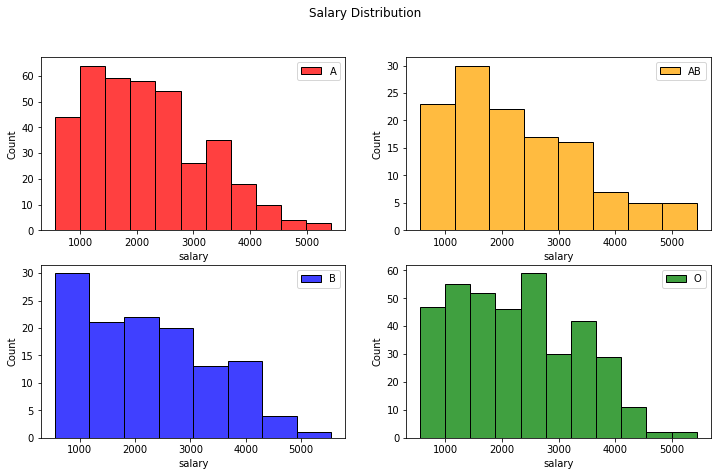

In [82]:
x1=df[df['groups']=='A']
x2=df[df['groups']=='AB']
x3=df[df['groups']=='B']
x4=df[df['groups']=='O']

plt.subplot(2,2,1)
sns.histplot(x1['salary'],color='red',label='A')
plt.legend()

plt.subplot(2,2,2)
sns.histplot(x2['salary'],color='orange',label='AB')
plt.legend()

plt.subplot(2,2,3)
sns.histplot(x3['salary'],color='blue',label='B')
plt.legend()

plt.subplot(2,2,4)
sns.histplot(x4['salary'],color='green',label='O')
plt.legend()

plt.suptitle('Salary Distribution')
plt.show()

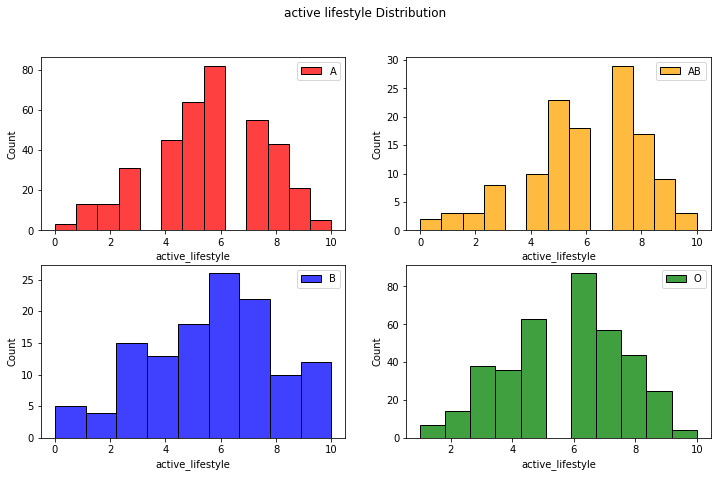

In [83]:
x1=df[df['groups']=='A']
x2=df[df['groups']=='AB']
x3=df[df['groups']=='B']
x4=df[df['groups']=='O']

plt.subplot(2,2,1)
sns.histplot(x1['active_lifestyle'],color='red',label='A')
plt.legend()

plt.subplot(2,2,2)
sns.histplot(x2['active_lifestyle'],color='orange',label='AB')
plt.legend()

plt.subplot(2,2,3)
sns.histplot(x3['active_lifestyle'],color='blue',label='B')
plt.legend()

plt.subplot(2,2,4)
sns.histplot(x4['active_lifestyle'],color='green',label='O')
plt.legend()

plt.suptitle('active lifestyle Distribution')
plt.show()

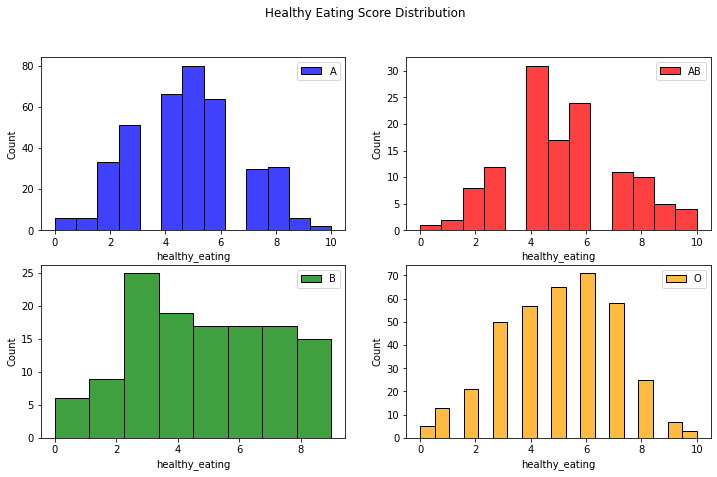

In [84]:
x1=df[df['groups']=='A']
x2=df[df['groups']=='AB']
x3=df[df['groups']=='B']
x4=df[df['groups']=='O']

plt.subplot(2,2,1)
sns.histplot(x1['healthy_eating'],color='blue',label='A')
plt.legend()

plt.subplot(2,2,2)
sns.histplot(x2['healthy_eating'],color='red',label='AB')
plt.legend()

plt.subplot(2,2,3)
sns.histplot(x3['healthy_eating'],color='green',label='B')
plt.legend()

plt.subplot(2,2,4)
sns.histplot(x4['healthy_eating'],color='orange',label='O')
plt.legend()

plt.suptitle('Healthy Eating Score Distribution')
plt.show()

### IRIS Dataset

In [85]:
df = pd.read_csv("Iris.csv")

In [86]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
df.drop(columns=["Id"],inplace=True)

In [88]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [90]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


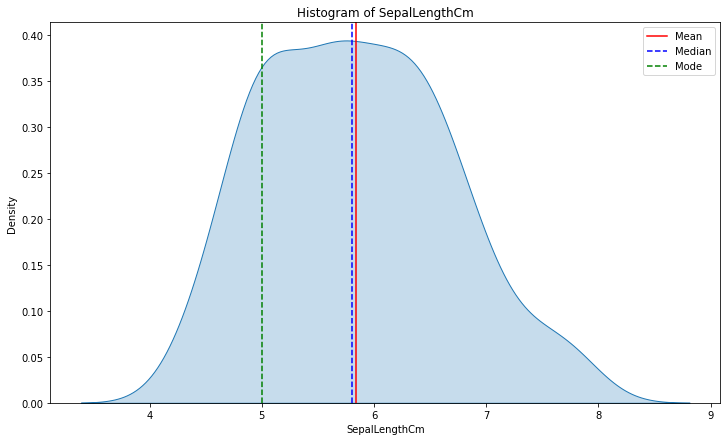

In [91]:
sns.kdeplot(df['SepalLengthCm'],shade=True).set(title='Histogram of SepalLengthCm')
plt.axvline(x=df['SepalLengthCm'].mean(),color='red',label="Mean")

plt.axvline(x=df['SepalLengthCm'].median(),color='blue',ls='--',label="Median")
plt.axvline(x=df['SepalLengthCm'].mode()[0],color='green',ls='--',label="Mode")
plt.legend()
plt.show()

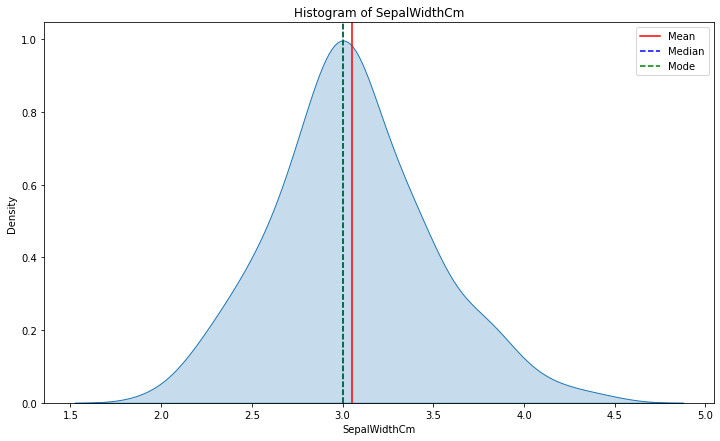

In [92]:
sns.kdeplot(df['SepalWidthCm'],shade=True).set(title='Histogram of SepalWidthCm')
plt.axvline(x=df['SepalWidthCm'].mean(),color='red',label="Mean")

plt.axvline(x=df['SepalWidthCm'].median(),color='blue',ls='--',label="Median")
plt.axvline(x=df['SepalWidthCm'].mode()[0],color='green',ls='--',label="Mode")
plt.legend()
plt.show()

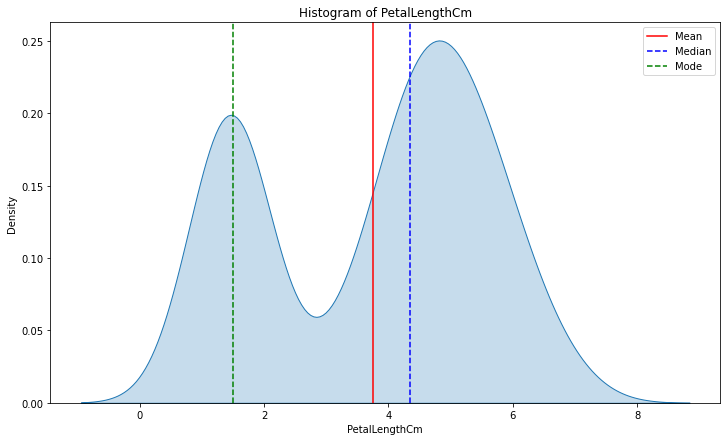

In [93]:
sns.kdeplot(df['PetalLengthCm'],shade=True).set(title='Histogram of PetalLengthCm')
plt.axvline(x=df['PetalLengthCm'].mean(),color='red',label="Mean")

plt.axvline(x=df['PetalLengthCm'].median(),color='blue',ls='--',label="Median")
plt.axvline(x=df['PetalLengthCm'].mode()[0],color='green',ls='--',label="Mode")
plt.legend()
plt.show()

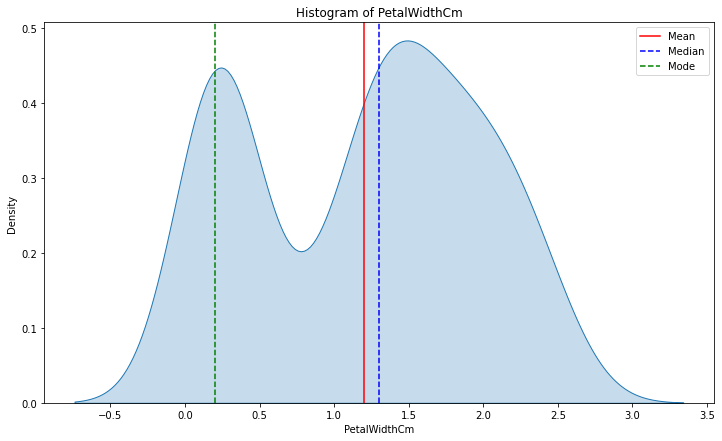

In [94]:
sns.kdeplot(df['PetalWidthCm'],shade=True).set(title='Histogram of PetalWidthCm')
plt.axvline(x=df['PetalWidthCm'].mean(),color='red',label="Mean")

plt.axvline(x=df['PetalWidthCm'].median(),color='blue',ls='--',label="Median")
plt.axvline(x=df['PetalWidthCm'].mode()[0],color='green',ls='--',label="Mode")
plt.legend()
plt.show()

In [95]:
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [96]:
df.groupby('Species').median()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [97]:
df.groupby('Species').std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [98]:
df.groupby('Species').min()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [99]:
df.groupby('Species').max()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


In [100]:
df.groupby('Species')['SepalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [101]:
df.groupby('Species')['SepalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [102]:
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [103]:
df.groupby('Species')['PetalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


In [113]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can

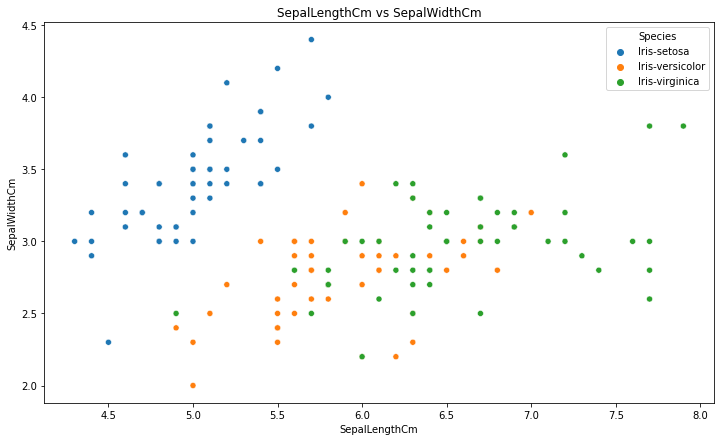

In [115]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('SepalLengthCm vs SepalWidthCm')
plt.show()

/home/karan/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


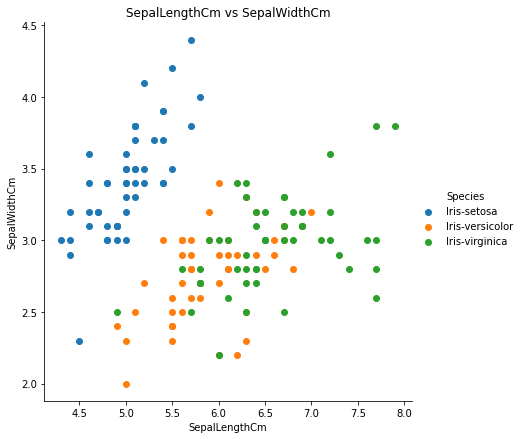

In [104]:
g=sns.FacetGrid(df,hue='Species',size=6)
g.map(plt.scatter, "SepalLengthCm","SepalWidthCm").add_legend()
plt.title('SepalLengthCm vs SepalWidthCm')
plt.show()

/home/karan/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


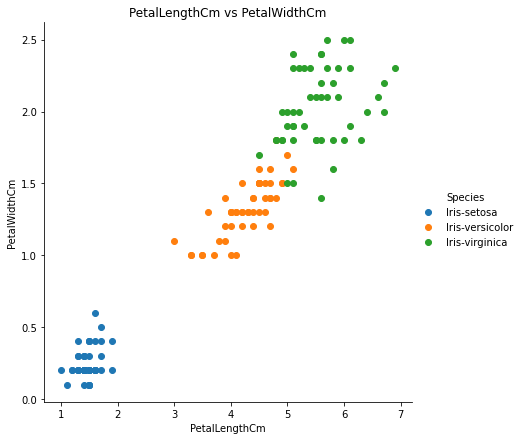

In [105]:
g=sns.FacetGrid(df,hue='Species',size=6)
g.map(plt.scatter, "PetalLengthCm","PetalWidthCm").add_legend()
plt.title('PetalLengthCm vs PetalWidthCm')
plt.show()